# Accuracy per epoch for batch/learning rate combinations
## CIFAR100 SGD runs on DL server 

In [17]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os
import seaborn as sns

In [2]:
logdir="logs/flextime/0_6x100/01_SGD/experiment01"

In [219]:
batch_l = np.arange(896,1665,128)
print batch_l
lr_l = np.arange(0.1,0.31,0.05)
print lr_l
files = []
for batch in batch_l:
    for lr in lr_l:
        filename = "cifar_log_b{}_l{:.3f}.log".format(batch,lr)
        files.append(os.path.abspath(os.path.join(logdir,filename)))
#files

[ 896 1024 1152 1280 1408 1536 1664]
[ 0.1   0.15  0.2   0.25  0.3 ]


In [220]:
batch_learn_pattern = re.compile(r"^b\s*(\d+)\s+l\s*([0-9\.]+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
remove_str="[J"

def fileToDF(filename,debug=False):
    filename = filename.strip(" \n")
    with open(filename,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0    
        run = 0
        loss = 0
        acc = 0
        time = 0
        ind = 0
        df = pd.DataFrame(data=None,columns=["batch","learn","loss","acc","time","epoch"])
        for line in lines:
            s = line.strip('\n')
            s = s.replace(remove_str,"")
            #if debug: print line[:75]
            m = batch_learn_pattern.match(s)        
            if m:
                batch = int(m.group(1))
                learn = float(m.group(2))            
                epoch = 0
            else:
                m = output_pattern.match(s)
                if m:
                    epoch = int(m.group(1))
                    loss = float(m.group(3))
                    acc = float(m.group(5))
                    time = float(m.group(6))
                    #print batch,learn,loss,acc,time
                    df.loc[ind] = [batch,learn,loss,acc,time,epoch]
                    ind += 1
    return df

In [221]:
df = pd.DataFrame(data=None,columns=["batch","learn","loss","acc","time","epoch"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(2605, 6)


,batch,learn,loss,acc,time,epoch
0,896.0,0.1,4.62374,0.010644,25.4220,1.0
1,896.0,0.1,4.82717,0.010272,49.9441,2.0
2,896.0,0.1,5.30386,0.011522,74.6529,3.0
3,896.0,0.1,5.57411,0.010623,99.6266,4.0
4,896.0,0.1,4.83472,0.015894,124.4550,5.0


In [213]:
df = df.sort_values(by=["batch","learn"],ascending=False)
df.head()

,batch,learn,loss,acc,time,epoch
2532,1664.0,0.3,4.62465,0.023180,28.2111,1.0
2533,1664.0,0.3,4.62413,0.009787,52.5102,2.0
2534,1664.0,0.3,4.82495,0.008585,77.0416,3.0
2535,1664.0,0.3,5.10556,0.018029,101.6660,4.0
2536,1664.0,0.3,5.21156,0.021205,126.4030,5.0


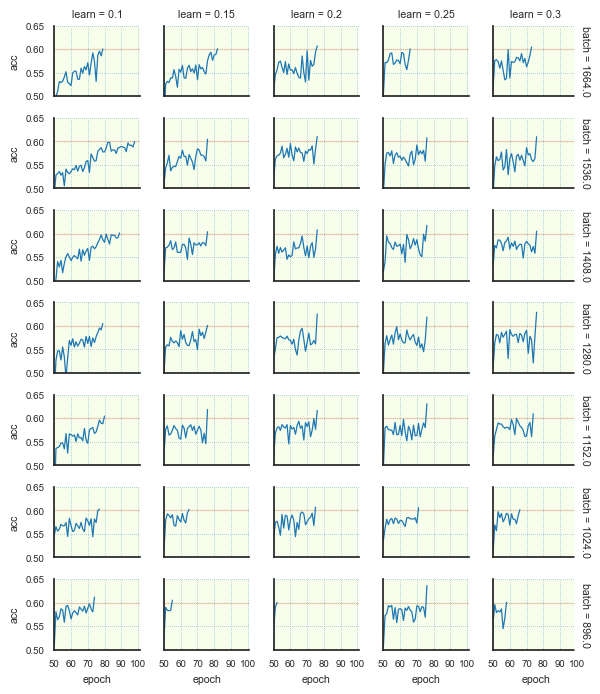

In [214]:
# Plot using Seaborn FacetGrid
# Set Seaborn global parameters
sns.set(font_scale=0.7)
sns.set_style("white",{'axes.grid': True, 'grid.color': (0,0,0),'grid.linestyle':u':'})
#print sns.axes_style()

# Plot using "tab10" matplotlib colormap
with sns.color_palette("tab10"):
    fg = sns.FacetGrid(df,row="batch",col="learn",size=1,aspect=1.2,
                         row_order=df.batch.unique(),
                         margin_titles=True,
                         xlim=(50,101),
                         ylim=(0.5,.65),
                        subplot_kws={"facecolor":"#F7FEEB"})
    fg.map(plt.axhline,y=0.6,ls="-",c="#ff8855",linewidth=1,alpha=.3)
    fg.set(xticks=np.arange(50,101,10))
    fg.set(yticks=np.arange(0.5,0.66,.05))
    fg.map(plt.grid,alpha=.3,linewidth=0.5,aa=False)
    fg.map(plt.plot,"epoch","acc",ls="-",linewidth=.9)


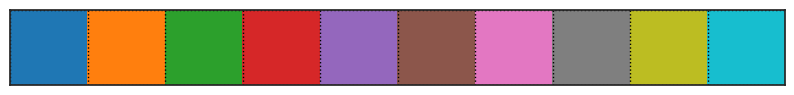

In [218]:
sns.palplot(sns.color_palette("tab10", 10))